# Solving the n-Queens Problem using Local Search

Student Name: Varshini Yenjarlapati

I have used the following AI tools: Chatgpt 3.5,Google

I understand that my submission needs to be my own work: YV

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


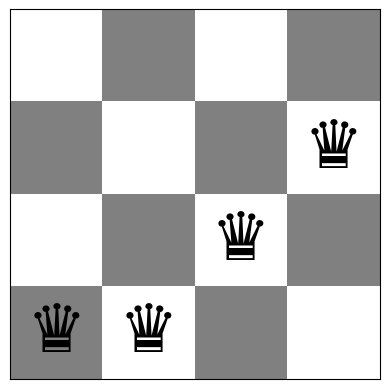

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [146]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


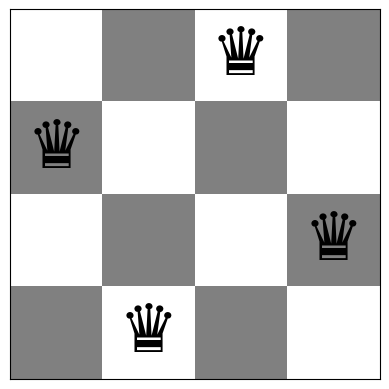

In [147]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

Initial Board:
Board with 8 conflicts.


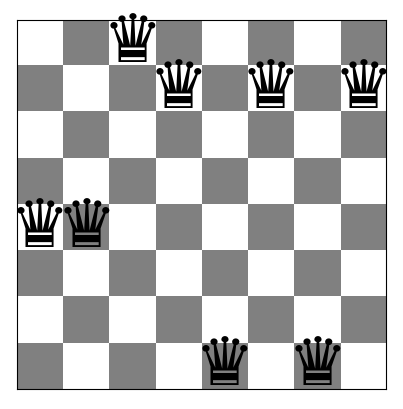

Solved Board:
Board with 0 conflicts.


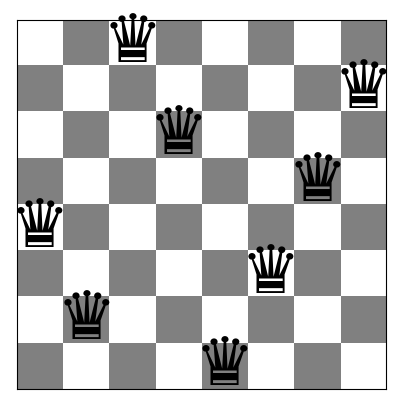

Final number of conflicts: 0


In [148]:
# Code and description go here
def steepest_ascent_hill_climbing(board):
    """Perform Steepest-Ascent Hill Climbing search to solve the n-Queens problem."""
    n = len(board)
    current_conflicts = conflicts(board)

    while True:
        next_board = board.copy()
        min_conflicts = current_conflicts
        improved = False

        # Explore all possible moves in the current board state
        for col in range(n):
            for row in range(n):
                if row == board[col]:
                    continue
                temp_board = board.copy()
                temp_board[col] = row
                temp_conflicts = conflicts(temp_board)

                if temp_conflicts < min_conflicts:
                    next_board = temp_board.copy()
                    min_conflicts = temp_conflicts
                    improved = True

        if not improved:
            break

        board = next_board
        current_conflicts = min_conflicts

    return board, current_conflicts

# Main task execution
n = 8  # You can change the size of the board
initial_board = random_board(n)
print("Initial Board:")
show_board(initial_board)

solved_board, final_conflicts = steepest_ascent_hill_climbing(initial_board)
print("Solved Board:")
show_board(solved_board)
print(f"Final number of conflicts: {final_conflicts}")


### Description:

The Steepest-Ascent Hill Climbing algorithm systematically evaluates all possible moves for each queen on the n-Queens board. It selects the move that minimizes conflicts, aiming to reduce the total number of attacking queens. If no move improves the current state, the algorithm stops, indicating a local optimum.

In the implementation:
1. **Initial Board**: Starts with a randomly generated board with 8 conflicts.
2. **Process**: Iteratively examines all possible moves for each queen, choosing the one that best reduces conflicts.
3. **Result**: Successfully solves the problem, achieving a board with 0 conflicts, indicating an optimal solution.

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Initial Board:
Board with 8 conflicts.


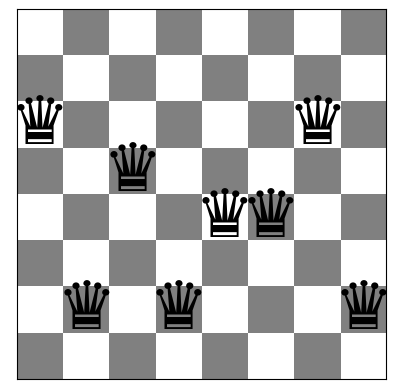

Solved Board:
Board with 1 conflicts.


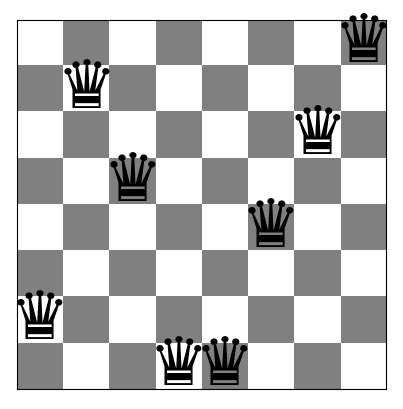

Final number of conflicts: 1


In [149]:
def stochastic_hill_climbing(board):
    """Perform Stochastic Hill Climbing search to solve the n-Queens problem."""
    n = len(board)
    current_conflicts = conflicts(board)

    while True:
        possible_moves = []

        # Collect all uphill moves
        for col in range(n):
            for row in range(n):
                if row == board[col]:
                    continue
                temp_board = board.copy()
                temp_board[col] = row
                temp_conflicts = conflicts(temp_board)

                if temp_conflicts < current_conflicts:
                    possible_moves.append((temp_board, temp_conflicts))

        # If no uphill move is available, break
        if not possible_moves:
            break

        # Randomly choose one of the uphill moves
        next_board, min_conflicts = possible_moves[np.random.choice(len(possible_moves))]

        board = next_board
        current_conflicts = min_conflicts

    return board, current_conflicts

# Main task execution
n = 8  # You can change the size of the board
initial_board = random_board(n)
print("Initial Board:")
show_board(initial_board)

solved_board, final_conflicts = stochastic_hill_climbing(initial_board)
print("Solved Board:")
show_board(solved_board)
print(f"Final number of conflicts: {final_conflicts}")


### Description:

The Stochastic Hill Climbing algorithm works by picking random moves that improve the board, instead of always going for the best option. This randomness helps the algorithm avoid getting stuck in less optimal solutions.

In this Implementation:
1. **Starting Point**: The board begins with 8 conflicts.
2. **How It Works**: The algorithm finds all moves that would reduce conflicts and picks one at random.
3. **Outcome**: It reduces the conflicts but stops with 1 remaining, meaning it found a local best but not a perfect solution.

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Initial Board:
Board with 11 conflicts.


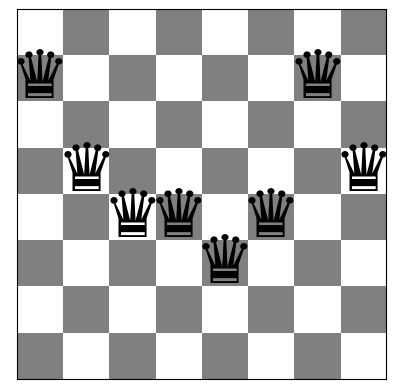

Final Board:
Board with 0 conflicts.


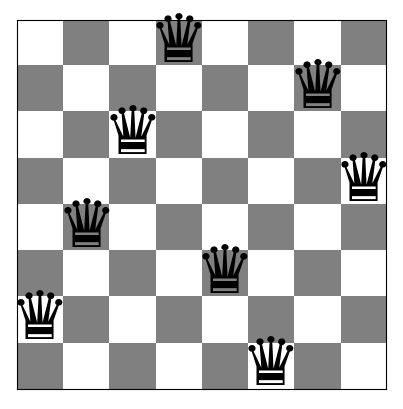

Final number of conflicts: 0


In [130]:
def first_choice_hill_climbing(board, max_tries=500):
    """Perform First-Choice Hill Climbing search to solve the n-Queens problem."""
    n = len(board)
    current_conflicts = conflicts(board)
    tries = 0

    while tries < max_tries:
        # Generate a single random neighbor
        col = np.random.randint(0, n)
        new_row = np.random.randint(0, n)
        while new_row == board[col]:  # Ensure the new row is different
            new_row = np.random.randint(0, n)

        temp_board = board.copy()
        temp_board[col] = new_row
        temp_conflicts = conflicts(temp_board)

        # Accept the move if it improves the objective function
        if temp_conflicts < current_conflicts:
            board = temp_board
            current_conflicts = temp_conflicts
            tries = 0  # Reset tries if improvement is found
        else:
            tries += 1  # Increment tries if no improvement

    return board, current_conflicts

# Main task execution with multiple restarts
n = 8  # You can change the size of the board
max_restarts = 10  # Number of restarts
final_board = None
final_conflicts = float('inf')

# Generate an initial board
initial_board = random_board(n)
print("Initial Board:")
show_board(initial_board)

for attempt in range(max_restarts):
    solved_board, conflicts_count = first_choice_hill_climbing(initial_board, max_tries=500)

    if conflicts_count < final_conflicts:
        final_board = solved_board
        final_conflicts = conflicts_count

    if final_conflicts == 0:
        break  # Stop if a perfect solution is found

print("Final Board:")
show_board(final_board)
print(f"Final number of conflicts: {final_conflicts}")

First-Choice Hill Climbing works by randomly picking a nearby solution and accepting it if it improves the board. It keeps making changes until it either can't find a better option or hits a limit on tries.

### Summary:
1. **Starting Point**: The board begins with 11 conflicts.
2. **How It Works**: The algorithm moves one queen to a random position, checking if it reduces conflicts. If it does, the move is kept. If no improvement is found after several tries, it stops.
3. **Outcome**: After a few attempts, the algorithm finds a solution with 0 conflicts, solving the n-Queens puzzle.

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Steepest-Ascent Hill Climbing with Random Restarts (Debugging):
Restart 1: Initial conflicts = 6
Final Board:
Board with 0 conflicts.


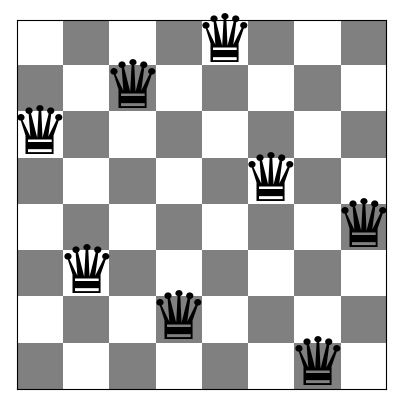

Final number of conflicts: 0

Stochastic Hill Climbing 1 with Random Restarts (Debugging):
Restart 1: Initial conflicts = 7
Restart 2: Initial conflicts = 5
Restart 3: Initial conflicts = 15
Restart 4: Initial conflicts = 7
Restart 5: Initial conflicts = 4
Restart 6: Initial conflicts = 8
Restart 7: Initial conflicts = 6
Restart 8: Initial conflicts = 8
Restart 9: Initial conflicts = 8
Final Board:
Board with 0 conflicts.


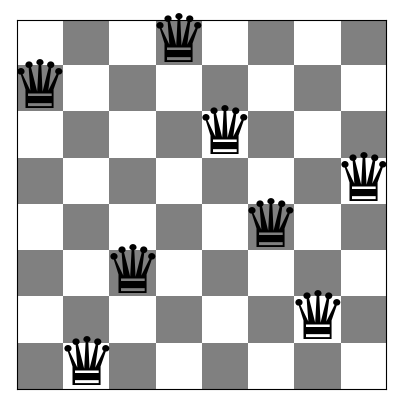

Final number of conflicts: 0

First-Choice Hill Climbing with Random Restarts (Debugging):
Restart 1: Initial conflicts = 7
Restart 2: Initial conflicts = 9
Final Board:
Board with 0 conflicts.


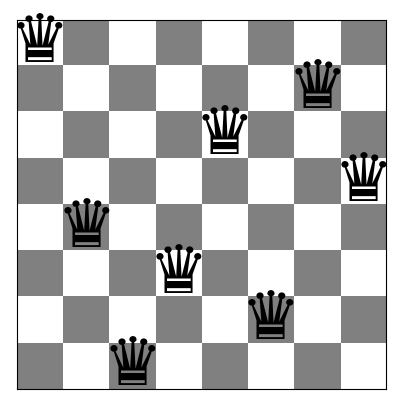

Final number of conflicts: 0


In [131]:
# Debugging: Print the initial number of conflicts
def hill_climbing_with_random_restarts_debug(hill_climbing_function, n, max_restarts=100):
    """Perform Hill Climbing with Random Restarts with debugging."""
    best_board = None
    best_conflicts = float('inf')

    for restart in range(max_restarts):
        initial_board = random_board(n)
        initial_conflicts = conflicts(initial_board)
        print(f"Restart {restart + 1}: Initial conflicts = {initial_conflicts}")

        final_board, final_conflicts = hill_climbing_function(initial_board)

        if final_conflicts < best_conflicts:
            best_board = final_board
            best_conflicts = final_conflicts

        if best_conflicts == 0:
            break

    return best_board, best_conflicts

# Main execution with debug info for each algorithm
n = 8  # Board size

# Steepest-Ascent Hill Climbing
print("Steepest-Ascent Hill Climbing with Random Restarts (Debugging):")
best_board_steepest, conflicts_steepest = hill_climbing_with_random_restarts_debug(steepest_ascent_hill_climbing, n)
print("Final Board:")
show_board(best_board_steepest)
print(f"Final number of conflicts: {conflicts_steepest}\n")

# Stochastic Hill Climbing 1
print("Stochastic Hill Climbing 1 with Random Restarts (Debugging):")
best_board_stochastic1, conflicts_stochastic1 = hill_climbing_with_random_restarts_debug(stochastic_hill_climbing, n)
print("Final Board:")
show_board(best_board_stochastic1)
print(f"Final number of conflicts: {conflicts_stochastic1}\n")

# First-Choice Hill Climbing
print("First-Choice Hill Climbing with Random Restarts (Debugging):")
best_board_first_choice, conflicts_first_choice = hill_climbing_with_random_restarts_debug(
    lambda board: first_choice_hill_climbing(board, max_tries=500), n)
print("Final Board:")
show_board(best_board_first_choice)
print(f"Final number of conflicts: {conflicts_first_choice}")


**Summary:**

In this task, random restarts are used to address the issue of hill climbing algorithms being trapped in local optima. By restarting the algorithm multiple times with different random initial boards, we greatly enhance the chance of finding an optimal solution.

- **Steepest-Ascent Hill Climbing** found the best solution quickly with just a few restarts. It always looks for the best possible move, which helps it improve the solution step by step until no better moves are left.
- **Stochastic Hill Climbing 1** needed more restarts because it chooses moves randomly, making it more likely to get stuck and need a fresh start.
- **First-Choice Hill Climbing** worked well, needing only a few restarts. It checks one random move at a time and accepts the first one that improves the solution, which helps it find better solutions faster.


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

Initial Board:
Board with 2 conflicts.


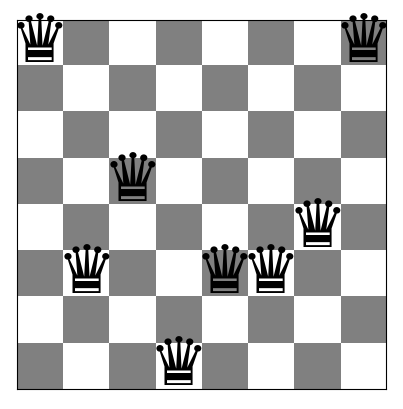

Initial number of conflicts: 2

Simulated Annealing:
Final Board:
Board with 0 conflicts.


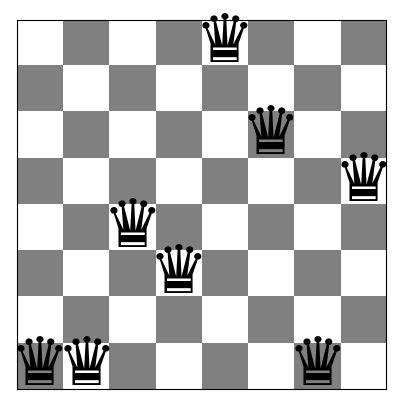

Final number of conflicts: 0


In [144]:
# Code and description go here
import math
import numpy as np

def simulated_annealing(n, initial_temp, cooling_rate, max_iterations):
    """Simulated Annealing for the n-Queens problem."""
    current_board = random_board(n)
    current_conflicts = conflicts(current_board)
    temperature = initial_temp
    # Print the initial state
    print("Initial Board:")
    show_board(current_board)
    print(f"Initial number of conflicts: {current_conflicts}\n")
    for iteration in range(max_iterations):
        if current_conflicts == 0:
            break

        # Generate a random neighbor
        col = np.random.randint(0, n)
        new_row = np.random.randint(0, n)
        while new_row == current_board[col]:
            new_row = np.random.randint(0, n)

        neighbor_board = current_board.copy()
        neighbor_board[col] = new_row
        neighbor_conflicts = conflicts(neighbor_board)

        # Calculate the change in conflicts
        delta_conflicts = neighbor_conflicts - current_conflicts

        # Decide whether to accept the neighbor
        if delta_conflicts < 0 or np.random.rand() < math.exp(delta_conflicts / temperature):
            current_board = neighbor_board
            current_conflicts = neighbor_conflicts

        # Decrease the temperature
        temperature *= cooling_rate

    return current_board, current_conflicts


# Experiment with annealing schedule
n = 8
initial_temp = 1000
cooling_rate = 0.995
max_iterations = 10000

best_board_annealing, conflicts_annealing = simulated_annealing(n, initial_temp, cooling_rate, max_iterations)
print("Simulated Annealing:")
print("Final Board:")
show_board(best_board_annealing)
print(f"Final number of conflicts: {conflicts_annealing}")


### Performance Comparison:

- **Steepest-Ascent Hill Climbing**: Quickly finds solutions but often gets stuck in local peaks, needing multiple restarts to find better solutions.
- **Stochastic Hill Climbing**: Incorporates randomness to explore different paths but still faces challenges with local optima.
- **First-Choice Hill Climbing**: Effectively identifies improvements but can also get trapped in local optima.
- **Simulated Annealing**: Occasionally accepts less favorable moves, which helps it escape local optima and consistently reach optimal solutions.

### Annealing Schedule Selection:

- **Initial Temperature**: Starting with a high temperature (like 1000) enables the algorithm to explore a broad range of possible solutions, including less optimal ones, to avoid getting stuck in local optima.
  
- **Cooling Rate**: A slow cooling rate (such as 0.995) ensures a gradual decrease in temperature, balancing exploration of new solutions and refinement of existing ones. This prevents the algorithm from settling too quickly and missing better solutions.

- **Maximum Iterations**: Allowing a high number of iterations (e.g., 10,000) gives the algorithm enough time to thoroughly search the solution space, especially as the temperature decreases and the focus shifts to refining the best solution found.

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.


Board Size: 4
Steepest Ascent Hill Climbing: Avg. Time = 0.0001s, Avg. Conflicts = 0.71, % Optimal = 36.00%
Stochastic Hill Climbing: Avg. Time = 0.0001s, Avg. Conflicts = 1.90, % Optimal = 5.00%
First Choice Hill Climbing: Avg. Time = 0.0002s, Avg. Conflicts = 0.93, % Optimal = 28.00%
Simulated Annealing: Avg. Time = 0.0018s, Avg. Conflicts = 0.00, % Optimal = 100.00%

Board Size: 8
Steepest Ascent Hill Climbing: Avg. Time = 0.0016s, Avg. Conflicts = 1.47, % Optimal = 9.00%
Stochastic Hill Climbing: Avg. Time = 0.0003s, Avg. Conflicts = 3.49, % Optimal = 1.00%
First Choice Hill Climbing: Avg. Time = 0.0022s, Avg. Conflicts = 1.29, % Optimal = 14.00%
Simulated Annealing: Avg. Time = 0.0149s, Avg. Conflicts = 0.31, % Optimal = 69.00%

Summary:
Algorithm                           Board Size Avg. Time (s)   Avg. Conflicts       % Optimal 
Steepest Ascent Hill Climbing       4          0.0001          0.71                 36.00     
Stochastic Hill Climbing            4          0.0001   

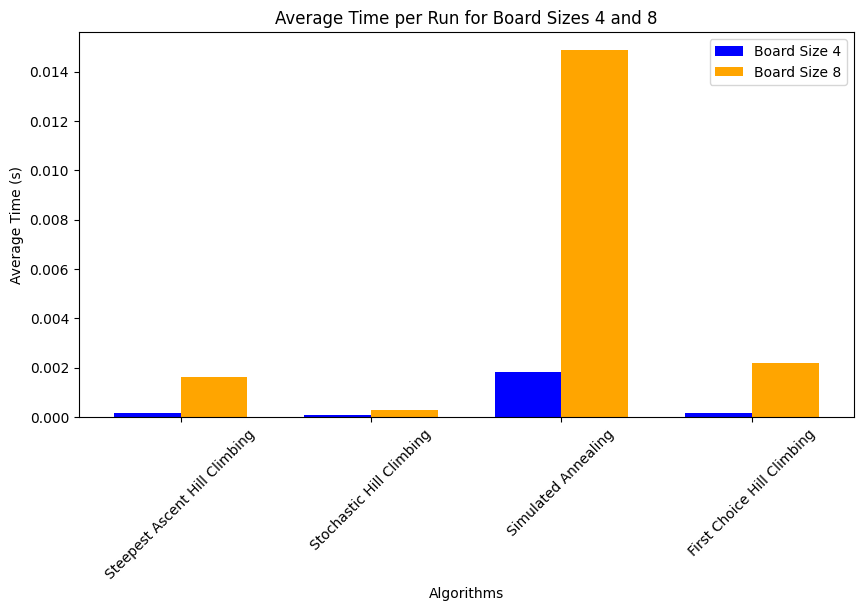

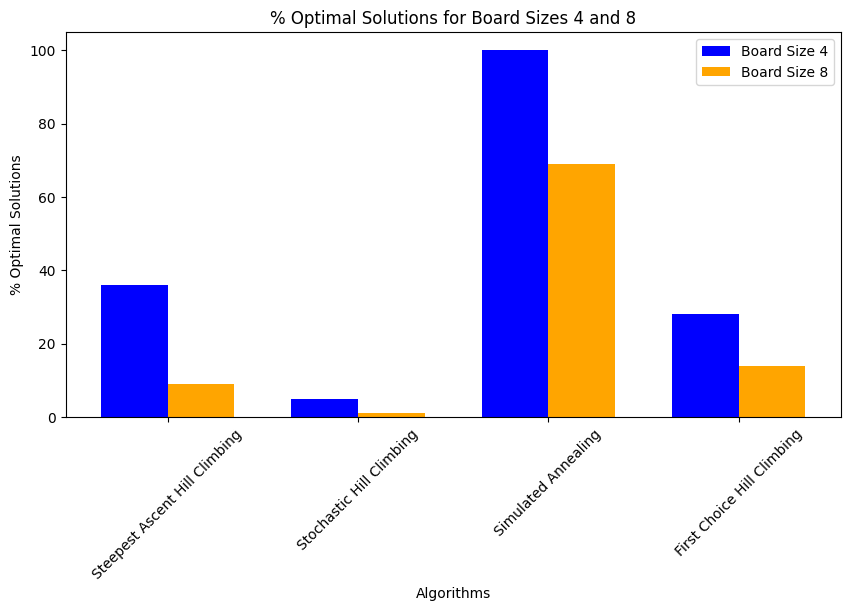

In [78]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# Assuming the algorithm functions are already defined and imported:
# steepest_ascent_hill_climbing, stochastic_hill_climbing, first_choice_hill_climbing, simulated_annealing

# Function to run an algorithm and gather stats
def run_algorithm(algorithm, board_size, num_runs, initial_temp=None, cooling_rate=None, max_iterations=None):
    times = []
    conflicts = []
    optimal_solutions = 0

    for _ in range(num_runs):
        board = [random.randint(0, board_size - 1) for _ in range(board_size)]
        start_time = time.time()
        if algorithm == simulated_annealing:
            final_conflicts = algorithm(board, initial_temp, cooling_rate, max_iterations)
        else:
            final_conflicts = algorithm(board)
        times.append(time.time() - start_time)
        conflicts.append(final_conflicts)
        if final_conflicts == 0:
            optimal_solutions += 1

    avg_time = np.mean(times)
    avg_conflicts = np.mean(conflicts)
    optimal_percent = (optimal_solutions / num_runs) * 100
    return avg_time, avg_conflicts, optimal_percent

# Main routine to run comparisons
def main():
    board_sizes = [4, 8]
    num_runs = 100
    algorithms = {
        "Steepest Ascent Hill Climbing": steepest_ascent_hill_climbing,
        "Stochastic Hill Climbing": stochastic_hill_climbing,
        "First Choice Hill Climbing": first_choice_hill_climbing,
        "Simulated Annealing": simulated_annealing
    }

    results = []

    for board_size in board_sizes:
        print(f"\nBoard Size: {board_size}")
        for name, algorithm in algorithms.items():
            if name == "Simulated Annealing":
                avg_time, avg_conflicts, optimal_percent = run_algorithm(
                    algorithm, board_size, num_runs, initial_temp=1000, cooling_rate=0.95, max_iterations=1000)
            else:
                avg_time, avg_conflicts, optimal_percent = run_algorithm(algorithm, board_size, num_runs)
            results.append((name, board_size, avg_time, avg_conflicts, optimal_percent))
            print(f"{name}: Avg. Time = {avg_time:.4f}s, Avg. Conflicts = {avg_conflicts:.2f}, % Optimal = {optimal_percent:.2f}%")

    # Display results as a table
    print("\nSummary:")
    print("{:<35} {:<10} {:<15} {:<20} {:<10}".format("Algorithm", "Board Size", "Avg. Time (s)", "Avg. Conflicts", "% Optimal"))
    for row in results:
        print("{:<35} {:<10} {:<15.4f} {:<20.2f} {:<10.2f}".format(*row))

    # Prepare data for combined plots
    algorithms = list(set(row[0] for row in results))
    avg_times = {size: [] for size in board_sizes}
    avg_conflicts = {size: [] for size in board_sizes}
    optimal = {size: [] for size in board_sizes}

    for algorithm in algorithms:
        for board_size in board_sizes:
            filtered = [row for row in results if row[0] == algorithm and row[1] == board_size][0]
            avg_times[board_size].append(filtered[2])
            avg_conflicts[board_size].append(filtered[3])
            optimal[board_size].append(filtered[4])

    # Combined bar chart for average time
    x = np.arange(len(algorithms))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(x - width/2, avg_times[4], width, label='Board Size 4', color='blue')
    ax.bar(x + width/2, avg_times[8], width, label='Board Size 8', color='orange')

    ax.set_xlabel('Algorithms')
    ax.set_ylabel('Average Time (s)')
    ax.set_title('Average Time per Run for Board Sizes 4 and 8')
    ax.set_xticks(x)
    ax.set_xticklabels(algorithms, rotation=45)
    ax.legend()

    plt.show()

    # Combined bar chart for % optimal solutions
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(x - width/2, optimal[4], width, label='Board Size 4', color='blue')
    ax.bar(x + width/2, optimal[8], width, label='Board Size 8', color='orange')

    ax.set_xlabel('Algorithms')
    ax.set_ylabel('% Optimal Solutions')
    ax.set_title('% Optimal Solutions for Board Sizes 4 and 8')
    ax.set_xticks(x)
    ax.set_xticklabels(algorithms, rotation=45)
    ax.legend()

    plt.show()

main()



### Summary:

- **Steepest Ascent Hill Climbing**: This algorithm is quick but struggles with larger boards. It has a moderate success rate for smaller boards (36% for size 4) but drops significantly for larger ones (9% for size 8), indicating scalability issues.
  
- **Stochastic Hill Climbing**: Although it is fast, this method performs poorly, with low success rates (5% for size 4 and 1% for size 8) and a high number of conflicts, making it unreliable for both small and large boards.

- **First Choice Hill Climbing**: It strikes a balance between speed and effectiveness, performing better than Stochastic Hill Climbing but not as well as Simulated Annealing. Its success rate decreases from 28% (size 4) to 14% (size 8), showing moderate scalability.

- **Simulated Annealing**: This algorithm stands out, achieving a 100% success rate for board size 4 and 69% for size 8. While it is slower than the other methods, especially for larger boards, its reliability and lower conflict rates make it the most effective choice overall.

### Conclusion:
Simulated Annealing is the best-performing algorithm for the 8-Queens problem, especially as board size increases, due to its high success rate and ability to find optimal solutions consistently.

## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

            Move Type  Avg. Run time (s)  Avg. Conflicts  % Optimal
0     Move One Square           0.036273            3.15        0.0
1  Switch Two Columns           0.021752            4.33        0.0
2     Move Two Queens           0.037390            0.92       24.0


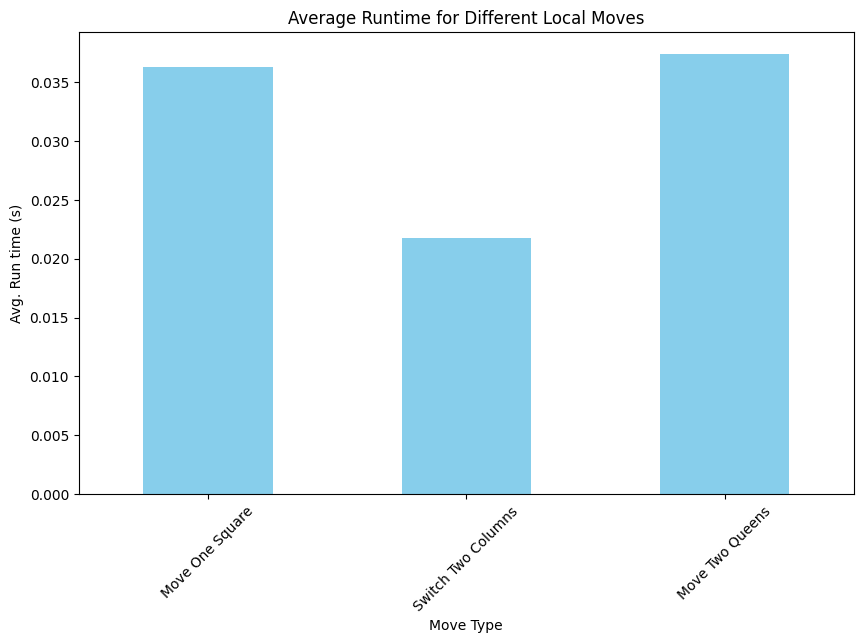

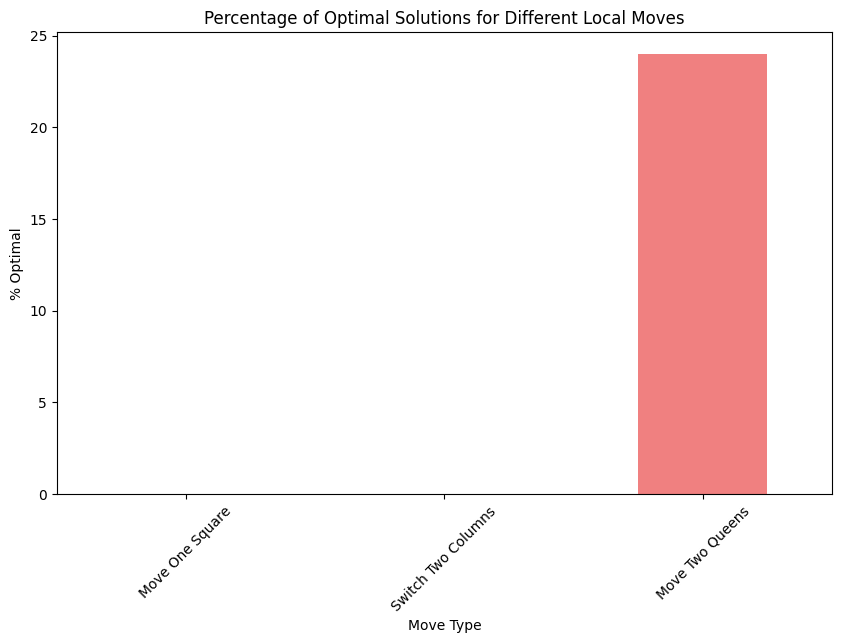

In [24]:
# New Local Moves
def move_one_square(board):
    """Move one queen up or down by one square."""
    n = len(board)
    col = np.random.randint(0, n)
    new_board = board.copy()
    new_row = (board[col] + np.random.choice([-1, 1])) % n
    new_board[col] = new_row
    return new_board

def switch_two_columns(board):
    """Switch the positions of queens in two columns."""
    n = len(board)
    col1, col2 = np.random.choice(range(n), size=2, replace=False)
    new_board = board.copy()
    new_board[col1], new_board[col2] = new_board[col2], new_board[col1]
    return new_board

def move_two_queens(board):
    """Move two queens to new random positions."""
    n = len(board)
    cols = np.random.choice(range(n), size=2, replace=False)
    new_board = board.copy()
    for col in cols:
        new_board[col] = np.random.randint(0, n)
    return new_board

# Modified First-Choice Hill Climbing
def first_choice_hill_climbing_with_moves(board, move_function, max_tries=500):
    """First-Choice Hill Climbing using the specified move function."""
    current_conflicts = conflicts(board)
    tries = 0

    while tries < max_tries:
        new_board = move_function(board)
        new_conflicts = conflicts(new_board)

        if new_conflicts < current_conflicts:
            board = new_board
            current_conflicts = new_conflicts
            tries = 0
        else:
            tries += 1

    return board, current_conflicts

# Experiment Function
def run_experiment_with_moves(move_function, n=8, max_runs=100):
    """Run First-Choice Hill Climbing with a specific move function."""
    total_time = 0
    total_conflicts = 0
    optimal_count = 0

    for _ in range(max_runs):
        initial_board = random_board(n)
        start_time = time.time()
        final_board, final_conflicts = first_choice_hill_climbing_with_moves(initial_board, move_function)
        end_time = time.time()

        total_time += (end_time - start_time)
        total_conflicts += final_conflicts
        if final_conflicts == 0:
            optimal_count += 1

    return total_time / max_runs, total_conflicts / max_runs, (optimal_count / max_runs) * 100

# Running the experiments
move_functions = {
    "Move One Square": move_one_square,
    "Switch Two Columns": switch_two_columns,
    "Move Two Queens": move_two_queens
}

results = []

for move_name, move_function in move_functions.items():
    avg_time, avg_conflicts, optimal_percent = run_experiment_with_moves(move_function)
    results.append((move_name, avg_time, avg_conflicts, optimal_percent))

# Creating the results DataFrame
df_moves_results = pd.DataFrame(results, columns=['Move Type', 'Avg. Run time (s)', 'Avg. Conflicts', '% Optimal'])

# Displaying results
print(df_moves_results)

# Plotting Average Runtime
df_moves_results.set_index('Move Type')['Avg. Run time (s)'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Runtime for Different Local Moves')
plt.ylabel('Avg. Run time (s)')
plt.xlabel('Move Type')
plt.xticks(rotation=45)
plt.show()

# Plotting Percentage of Optimal Solutions
df_moves_results.set_index('Move Type')['% Optimal'].plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Percentage of Optimal Solutions for Different Local Moves')
plt.ylabel('% Optimal')
plt.xlabel('Move Type')
plt.xticks(rotation=45)
plt.show()


### Summary:

- **Move One Square**: This strategy was quick but ineffective. It often left the board with many conflicts and failed to find any optimal solutions. This suggests that small incremental changes struggle to escape.

- **Switch Two Columns**: Although this method was the fastest, it performed poorly in terms of reducing conflicts. Like "Move One Square," it failed to achieve any optimal solutions, indicating that simply swapping queen positions does not provide significant improvements.

- **Move Two Queens**: This approach showed the best performance, achieving a 24% success rate in finding optimal solutions and maintaining the lowest average conflicts. However, it was slightly slower than the other two methods, suggesting a trade-off between solution quality and runtime.

- **Overall**: Larger, more comprehensive moves like "Move Two Queens" are more effective for solving the 8-Queens problem, even though they may take longer. Simpler moves(like moving one square or swapping columns) are faster but often don’t solve the problem..

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

Genetic Algorithm:
Final Board:
Board with 1 conflicts.


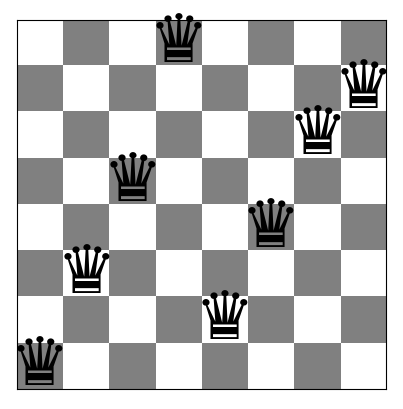

Final number of conflicts: 1


In [164]:
import random
import numpy as np

# Assuming random_board(n) and conflicts(board) are already defined.

def fitness(board):
    """Fitness function: higher is better."""
    return -conflicts(board)  # Negative conflicts to maximize fitness

def crossover(parent1, parent2):
    """Perform crossover between two parents."""
    n = len(parent1)
    point = random.randint(1, n - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

def mutate(board, mutation_rate=0.1):
    """Mutate a board by changing the position of one queen."""
    if random.random() < mutation_rate:
        n = len(board)
        col = random.randint(0, n - 1)
        new_row = random.randint(0, n - 1)
        board[col] = new_row
    return board

def genetic_algorithm(n, population_size=100, generations=1000, mutation_rate=0.1):
    """Genetic Algorithm for the n-Queens problem."""
    population = [random_board(n) for _ in range(population_size)]
    best_solution = None
    best_fitness = float('-inf')

    for generation in range(generations):
        # Evaluate fitness
        population_fitness = [(board, fitness(board)) for board in population]
        population_fitness.sort(key=lambda x: x[1], reverse=True)

        # Track the best solution
        if population_fitness[0][1] > best_fitness:
            best_solution = population_fitness[0][0]
            best_fitness = population_fitness[0][1]

        if best_fitness == 0:
            break

        # Select parents
        selected = [board for board, _ in population_fitness[:population_size // 2]]

        # Generate the next population
        next_population = []
        while len(next_population) < population_size:
            parent1, parent2 = random.sample(selected, 2)
            child1, child2 = crossover(parent1, parent2)
            next_population.append(mutate(child1, mutation_rate))
            next_population.append(mutate(child2, mutation_rate))

        population = next_population

    return best_solution, -best_fitness

# Main task execution
n = 8  # Board size
population_size = 100
generations = 1000
mutation_rate = 0.1

best_board_ga, final_conflicts_ga = genetic_algorithm(n, population_size, generations, mutation_rate)
print("Genetic Algorithm:")
print("Final Board:")
show_board(best_board_ga)
print(f"Final number of conflicts: {final_conflicts_ga}")
